In [1]:
######################
#import useful modules
######################

import sys

sys.path.append("/home/gula/Desktop/Work_capella/Python/Python_Modules_p3/") 

from Modules import *

from mpl_toolkits.axes_grid1 import AxesGrid
from matplotlib.offsetbox import AnchoredText

import cartopy.crs as ccrs
import gsw

########

%matplotlib inline


In [11]:
folder = './'

#################################################
# coordinates for vertical sections

sectionname = 'brazil_basin'


if sectionname == 'gog':
    lon = np.arange(-10, 15, 0.1)
    lat = lon * 0. + 0;
    maxdepth = -5000; 
elif sectionname == 'charleston':
    lon = np.linspace(-80.5, -75., 100)
    lat = lon * 0. + 31.5;
    maxdepth = -1000; 
elif sectionname == 'gulfstream':
    lon = np.linspace(-80.5, -75., 100)
    lat = lon * 0. + 31.5;
    maxdepth = -1000; 
elif sectionname == 'meddy':
    lat = np.linspace(33, 37., 100)
    lon = lat * 0. - 8.5;
    maxdepth = -3000; 
elif sectionname == 'brazil_basin':
    lon = np.linspace(-40, -10, 100)
    lat = lon * 0. - 21.3;
    maxdepth = -6000; 
    
    
#####

year = 2004

season = 'annual' # for WOA

lon1, lon2 = np.min(lon)-1,np.max(lon)+1


####

def find_nearest(x,y,lon, lat):
    dist = (x-lon)**2 + (y-lat)**2
    return np.unravel_index(dist.argmin(),dist.shape)

#################################################


In [3]:
case = 'gigatl6_1h_UP3'

## Load all domain (to get grid)
simul = load(simul = case + '_mean_2004', time = 0, output =False);

# Only load area around the section
lon0 = np.mean(lon); lat0 = np.mean(lat)
i0,j0 = find_nearest(simul.x,simul.y,lon0, lat0); print(i0,j0)


dx = 200; dy = 200
simul = load(simul = case + '_mean_' + format(year) + ' [' + format(j0-dy) + ','\
                                               + format(j0+dy) + ','\
                                               + format(i0-dx) + ','\
                                               + format(i0+dx) + ',[1,300,1]] ' + format(0),\
                                               output =True);





707 496
simulname is None
args (['gigatl6_1h_UP3_mean_2004', '[296,696,507,907,[1,300,1]]', '0'],)
args[0] ['gigatl6_1h_UP3_mean_2004', '[296,696,507,907,[1,300,1]]', '0']
len(args[0]) 3
time of simulation is: 0
coord
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL6/gigatl6_grd_masked.nc
file opened in get_domain
loading /net/omega/local/tmp/2/gula/GIGATL6/GIGATL6_1h_UP3/HIS/GIGATL6_5d_aver.mean.2004.nc
file opened in get_domain
get domain [296,696,507,907,[1,300,1]] [296,
file closed in get_domain
file closed in get_domain
coordmax
loading /net/libra/local/tmp/1//gula/ROMS/Simulations/GIGATL/GIGATL6/gigatl6_grd_masked.nc
file opened in get_domain
loading /net/omega/local/tmp/2/gula/GIGATL6/GIGATL6_1h_UP3/HIS/GIGATL6_5d_aver.mean.2004.nc
file opened in get_domain
get domain [0,1e9,0,1e9,[1,1e9,1]] [0,1e
file closed in get_domain
file closed in get_domain
cst
file opened in cst
read Cs_r in grdfile.variables
no Zob in job ... using Zob = 0.01
file closed in cst
dt
fi

In [4]:

def transform_griddata(var,lon,lat,lon_target,lat_target):
    return interp.griddata((lon.ravel(),lat.ravel()),var.ravel(),(lon_target,lat_target),method='cubic')
    
    
def transform(var,elem,coef):
    return np.sum(coef*var.ravel()[elem],1)

    
[elem_mod,coef_mod] = sm.get_tri_coef(simul.x,simul.y,lon,lat)


/home/gula/Desktop/Work_capella/Python/Python_Modules_p3/R_smooth.py:437: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  p[i,:] = np.linalg.lstsq(A.T,B.T)[0]


In [73]:
data = 'woa18'

#################
if 'woa' in data:

    ##########################
    # for WOA
    ##########################
    seasons=\
        {'annual': ['00',4],\
         'winter': ['13',0],\
         'spring': ['14',1],\
         'summer': ['15',2],\
         'fall': ['16',3]}

    if data=='woa18_mat': period = 'decav'; version = '_04' #average of all decades
    elif data=='woa13': period = 'decav'; version = '_04v2' #average of all decades
    elif data=='woa18': period = 'decav'; version = '_04' #average of all decades

    which_var = 'an' # 'mn' = binned, 'an' = objectively analyzed

    whicht='t_' + which_var
    whichs='s_' + which_var

    ############################

    #for season in ['annual']: #,'winter']:

    figname = data + '_' + which_var  +  '_' + period +  '_' + season

    ###################################################################################
    # WOA data
    ###################################################################################

    if 'mat' in data:
        filename = "/net/krypton/data0/project/meddle/lecorre/OBS/WOA/woa18_decav_t00_04.nc"
    else:
        filename = "/home/gula/libra/OBS/WOA/" + data + "_"+ period + "_t" + seasons[season][0] + version + ".nc"

    ncfile =  Dataset(filename, 'r', format='NETCDF3_CLASSIC')
    lon_woa = simul.Forder(ncfile.variables['lon_bnds'][:])
    lat_woa = simul.Forder(ncfile.variables['lat_bnds'][:])
    depth =  ncfile.variables['depth'][:]

    # Select subdomain for faster computation
    x1 = np.nanargmin(np.abs(lon_woa-lon1))-2
    x2 = np.nanargmin(np.abs(lon_woa-lon2))+2
    y1 = np.nanargmin(np.abs(lat_woa-np.nanmin(simul.y)))-2
    y2 = np.nanargmin(np.abs(lat_woa-np.nanmax(simul.y)))+2
    print(x1,x2,y1,y2)
    lon_woa = 0.5*(lon_woa[0,x1:x2]+lon_woa[1,x1:x2])
    lat_woa = 0.5*(lat_woa[0,y1:y2]+lat_woa[1,y1:y2])
    [woa_y,woa_x] = np.meshgrid(lat_woa,lon_woa)

    t_woa = simul.Forder(ncfile.variables[whicht][:])[x1:x2,y1:y2,:,0]
    tmask = simul.Forder(ncfile.variables['t_dd'][:])[x1:x2,y1:y2,:,0]
    t_woa[t_woa>100] = np.nan
    ncfile.close()

    ####################

    if 'mat' in data:
        filename_S = "/net/krypton/data0/project/meddle/lecorre/OBS/WOA/woa18_decav_s00_04.nc"
    else:
        filename_S = "/home/gula/libra/OBS/WOA/" + data + "_"+ period + "_s" + seasons[season][0] + version + ".nc"
    ncfile =  Dataset(filename_S, 'r', format='NETCDF3_CLASSIC')

    s_woa = simul.Forder(ncfile.variables[whichs][:])[x1:x2,y1:y2,:,0]
    smask = simul.Forder(ncfile.variables['s_dd'][:])[x1:x2,y1:y2,:,0]
    s_woa[s_woa>100] = np.nan
    ncfile.close()

    # need woa_x, woa_y, t_woa, s_woa

###################################################################################

elif 'isas' in data:

    figname = data + '_' + season

    ###################################################################################
    # ISAS data
    ###################################################################################

    if 'mat' in data:
        filename = "/net/krypton/data0/project/meddle/lecorre/OBS/ISAS/TRC/mean_temp_2002_2008.nc"
    elif season=='annual':
        filename = "/net/alpha/exports/sciences/data/LPO_ISAS/CLIM_ISAS15_DM/ISAS15_DMFD_S_ann_TEMP.nc"
    elif season=='winter':
        filename = "/home/gula/libra/OBS/ISAS/ISAS15_DMFD_winter_TEMP.nc"




    ncfile =  Dataset(filename, 'r', format='NETCDF3_CLASSIC')
    lon_woa = simul.Forder(ncfile.variables['longitude'][:])
    lat_woa = simul.Forder(ncfile.variables['latitude'][:])
    depth =  ncfile.variables['depth'][:]

    # Select subdomain for faster computation
    x1 = np.nanargmin(np.abs(lon_woa-lon1))-2
    x2 = np.nanargmin(np.abs(lon_woa-lon2))+2
    y1 = np.nanargmin(np.abs(lat_woa-np.nanmin(simul.y)))-2
    y2 = np.nanargmin(np.abs(lat_woa-np.nanmax(simul.y)))+2

    [woa_y,woa_x] = np.meshgrid(lat_woa[y1:y2],lon_woa[x1:x2])

    t_woa = simul.Forder(ncfile.variables['TEMP'][:])[x1:x2,y1:y2,:,0]
    #t_woa =  t_woa * ncfile.variables['TEMP'].scale_factor + ncfile.variables['TEMP'].add_offset
    t_woa[t_woa>100] = np.nan
    ncfile.close()

    ################

    if 'mat' in data:
        filename = "/net/krypton/data0/project/meddle/lecorre/OBS/ISAS/TRC/mean_salt_2002_2008.nc"
    elif season=='annual':
        filename = "/net/alpha/exports/sciences/data/LPO_ISAS/CLIM_ISAS15_DM/ISAS15_DMFD_S_ann_PSAL.nc"
    elif season=='winter':
        filename = "/home/gula/libra/OBS/ISAS/ISAS15_DMFD_winter_PSAL.nc"

    ncfile =  Dataset(filename, 'r', format='NETCDF3_CLASSIC')
    s_woa = simul.Forder(ncfile.variables['PSAL'][:])[x1:x2,y1:y2,:,0]
    #s_woa =  s_woa * ncfile.variables['PSAL'].scale_factor + ncfile.variables['PSAL'].add_offset
    s_woa[s_woa>100] = np.nan
    ncfile.close()

###################################################################################

elif 'soda' in data:

    figname = data + '_' + season

    ###################################################################################
    # ISAS data
    ###################################################################################

    if season=='annual':
        if '2011' in data:
            filename = "/home/gula/libra/OBS/SODA/soda3.4.2_mn_ocean_reg_2011-2011.nc"
        else:
            filename = "/home/gula/libra/OBS/SODA/soda3.4.2_mn_ocean_reg_2002-2008.nc"
        itime=0
    elif season=='winter':
        if '2011' in data:
            filename = "/home/gula/libra/OBS/SODA/soda3.4.2_mn_ocean_reg_2011_winter.nc"
        itime = 0

    ncfile =  Dataset(filename, 'r', format='NETCDF3_CLASSIC')
    lon_woa = simul.Forder(ncfile.variables['xt_ocean'][:])-360.
    lat_woa = simul.Forder(ncfile.variables['yt_ocean'][:])
    depth =  ncfile.variables['st_ocean'][:]

    # Select subdomain for faster computation
    x1 = np.nanargmin(np.abs(lon_woa-lon1))-2
    x2 = np.nanargmin(np.abs(lon_woa-lon2))+2
    y1 = np.nanargmin(np.abs(lat_woa-np.nanmin(simul.y)))-2
    y2 = np.nanargmin(np.abs(lat_woa-np.nanmax(simul.y)))+2

    [woa_y,woa_x] = np.meshgrid(lat_woa[y1:y2],lon_woa[x1:x2])

    t_woa = simul.Forder(ncfile.variables['temp'][:])[x1:x2,y1:y2,:,itime]
    #t_woa =  t_woa * ncfile.variables['TEMP'].scale_factor + ncfile.variables['TEMP'].add_offset
    t_woa[t_woa<-100] = np.nan

    ################

    s_woa = simul.Forder(ncfile.variables['salt'][:])[x1:x2,y1:y2,:,itime]
    #s_woa =  s_woa * ncfile.variables['PSAL'].scale_factor + ncfile.variables['PSAL'].add_offset
    s_woa[s_woa<-100] = np.nan

    ################

    rho_woa = simul.Forder(ncfile.variables['prho'][:])[x1:x2,y1:y2,:,itime]
    rho_woa[rho_woa<-100] = np.nan




#####################
# Interpolate Data
#####################

[elem_woa,coef_woa] = sm.get_tri_coef(woa_x,woa_y,lon,lat)

t_woa_rot = np.zeros((lon.shape[0],len(depth)))
s_woa_rot = np.zeros((lon.shape[0],len(depth)))

for iz in range(len(depth)):
    t_woa_rot[:,iz] = transform(t_woa[:,:,iz],elem_woa,coef_woa)
    s_woa_rot[:,iz] = transform(s_woa[:,:,iz],elem_woa,coef_woa)

####################

p = gsw.p_from_z(-depth,np.nanmean(lat))
SA_woa = gsw.SA_from_SP(s_woa_rot,p,np.nanmean(lon),np.nanmean(lat))

if 'soda' in data:
    CT_woa = gsw.CT_from_pt(SA_woa,t_woa_rot)
    pt_woa = t_woa_rot
else:
    CT_woa = gsw.CT_from_t(SA_woa,t_woa_rot,p)
    pt_woa = gsw.pt_from_t(SA_woa,t_woa_rot,p,0)

rho_gsw = gsw.rho(SA_woa,CT_woa,0) - 1000.

###################################################################################
# fields are p, SA, CT, pt_woa, rho_gsw, newlon, newlat,

lon_woa = lon
lat_woa = lat
CT_woa =  CT_woa.T
SA_woa =  SA_woa.T
rho_woa =  rho_gsw.T




554 686 209 343


/home/gula/Desktop/Work_capella/Python/Python_Modules_p3/R_smooth.py:437: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  p[i,:] = np.linalg.lstsq(A.T,B.T)[0]


In [74]:

def get_data(case,year,elem_mod,coef_mod):

    
    ##################################################################################
    # load simul
    
    simul = load(simul = case + '_mean_' + format(year) + ' [' + format(j0-dy) + ','\
                                                   + format(j0+dy) + ','\
                                                   + format(i0-dx) + ','\
                                                   + format(i0+dx) + ',[1,300,1]] ' + format(0), output =False);

    ##################################################################################

    toporot = transform(simul.topo,elem_mod,coef_mod)

    [z_r,z_w] = tools.get_depths(simul)

    temp = var('temp',simul).data
    salt = var('salt',simul).data
    rho1 = var('rho1',simul).data + simul.rho0 - 1000.

    nz = temp.shape[-1]

    ###########

    temprot = np.zeros((lon.shape[0],nz))
    saltrot = np.zeros((lon.shape[0],nz))
    zrot    = np.zeros((lon.shape[0],nz))
    rho1rot = np.zeros((lon.shape[0],nz))

    for iz in range(nz):
        temprot[:,iz] = transform(temp[:,:,iz],elem_mod,coef_mod)
        saltrot[:,iz] = transform(salt[:,:,iz],elem_mod,coef_mod)
        zrot[:,iz]    = transform(z_r[:,:,iz] ,elem_mod,coef_mod)
        rho1rot[:,iz] = transform(rho1[:,:,iz],elem_mod,coef_mod)


    #######

    p = gsw.p_from_z(zrot,np.nanmean(lat))
    SA_mod = gsw.SA_from_SP(saltrot,p,np.nanmean(lon),np.nanmean(lat))
    CT_mod = gsw.CT_from_pt(SA_mod,temprot)
    rho_gsw = gsw.rho(SA_mod,CT_mod,0) - 1000.


    ##################

    topo = toporot.T
    depth_mod = zrot.T
    CT_mod = CT_mod.T
    SA_mod = SA_mod.T
    rho_mod = rho_gsw.T

    return topo, depth_mod, CT_mod, SA_mod, rho_mod



In [82]:
################################

cbarlabelsize = 6
fontsize0 = 8
fontsize1 = 12
fontsize2 = format(18)
fontsize3 = format(24)
font = {'size'   : fontsize1}
py.rc('font', **font)

################################



def my_plot(topo, depth_mod, CT_mod, SA_mod, rho_mod, woa=False):

    ################################

    nz = depth_mod.shape[0]
    
    if lat[0]==lat[-1]:
        if woa: x_mod = lon_woa
        else: x_mod = np.tile(lon,(nz,1))
    else:
        if woa: x_mod = lat_woa
        else: x_mod = np.tile(lat,(nz,1))

    ################################

    xliml = np.min(x_mod); xlimr = np.max(x_mod)

    ################################

    my_cmap_ct=plot.ncview_colormap('jaisnc')
    levels_ct= np.arange(3.,25.,0.2)
    varunit_ct = 'CT [$^{\circ}$C]'

    my_cmap_sa=plot.ncview_colormap('jaisnb')
    levels_sa= np.arange(35.,36.8,0.02)
    varunit_sa = 'AS [g kg$^{-1}$]'

    levels_rho = np.concatenate([np.arange(23.,27.,0.2),np.arange(27.,27.7,0.1), np.arange(27.8,29,0.05)])

    ################################

    fig = py.figure(figsize=(12.0,6.0))

    ################################
    
    ax4 = fig.add_subplot(121,facecolor='Gainsboro')
    joe = ax4.contourf(x_mod, depth_mod, CT_mod, levels_ct, extend='both', cmap=my_cmap_ct)
    CS2 = ax4.contour(x_mod, depth_mod, rho_mod ,levels_rho, colors = ('k',), linewidths = (1.,))
    py.clabel(CS2, fmt = '%2.2f', colors = 'k', fontsize=fontsize0)  ;

    if not woa: ax4.plot(x_mod[0,:],-topo,'-k',lw=1.)

    py.ylabel('z [m]',fontsize=fontsize2)
    ax4.set_ylim([maxdepth, 0.]); py.xlim([xliml, xlimr])

    if woa: at = AnchoredText('WOA',loc='lower left', prop=dict(size=fontsize2), frameon=True, )
    else: at = AnchoredText(case,loc='lower left', prop=dict(size=fontsize2), frameon=True, )
        
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
    ax4.add_artist(at)

    #######################

    t1 = py.text(0.5, 1.3,  varunit_ct, fontsize=fontsize3,\
             horizontalalignment='center', verticalalignment='center', transform = ax4.transAxes)

    cbar_ax = fig.add_axes([0.1, 0.9, 0.35, 0.01])
    fig.colorbar(joe, cax=cbar_ax, orientation='horizontal')

    ################################

    ax9 = fig.add_subplot(122,facecolor='Gainsboro')

    joe = ax9.contourf(x_mod, depth_mod, SA_mod, levels_sa,extend='both', cmap=my_cmap_sa)
    CS2 = ax9.contour(x_mod, depth_mod, rho_mod ,levels_rho,colors = ('k',), linewidths = (1.,))
    py.clabel(CS2, fmt = '%2.2f', colors = 'k', fontsize=fontsize0)  ;

    if not woa: ax9.plot(x_mod[0,:],-topo,'-k',lw=1.)

    ax9.yaxis.set_major_formatter( NullFormatter() ); 

    ax9.set_ylim([maxdepth, 0.]); py.xlim([xliml, xlimr])

    ###############################################################################

    t1 = py.text(0.5, 1.3,  varunit_ct, fontsize=fontsize3,\
             horizontalalignment='center', verticalalignment='center', transform = ax9.transAxes)
    
    cbar_ax = fig.add_axes([0.1+0.45, 0.9, 0.35, 0.01])
    fig.colorbar(joe, ticks=[35,35.2,35.4, 35.6, 35.8],cax=cbar_ax, orientation='horizontal')


    ######################################
    # begin : map inset 
    ######################################

    central_lon, central_lat = lon_woa.mean(),lat_woa.mean()
    ax =  fig.add_axes([-0.25,0.4,0.3,0.3], projection=ccrs.Orthographic(central_lon, central_lat))
    extent = [simul.x.min(),simul.x.max(),simul.y.min(),simul.y.max()]

    ax.set_extent(extent); 
    ax.coastlines(resolution='10m')
    gl = ax.gridlines(draw_labels=True)
    gl.bottom_labels = False
    gl.right_labels = False

    plt.pcolormesh(simul.x, simul.y, simul.topo,transform=ccrs.PlateCarree())
    plt.plot(lon,lat,linewidth=3.,color='k',alpha=0.8, linestyle='--',transform=ccrs.PlateCarree())

    #######################

    plt.subplots_adjust(top=0.8)

    ########################################################################

    if woa: py.savefig(folder + 'section_' + sectionname + '_' + case + '_'  +\
               'woa' +  '.png', bbox_inches='tight'); 
    else: py.savefig(folder + 'section_' + sectionname + '_' + case + '_'  +\
               simul.simul + '_' + format(year)+  '.png', bbox_inches='tight'); 
    
####
    
# my_plot(topo, depth_mod, CT_mod, SA_mod, rho_mod)


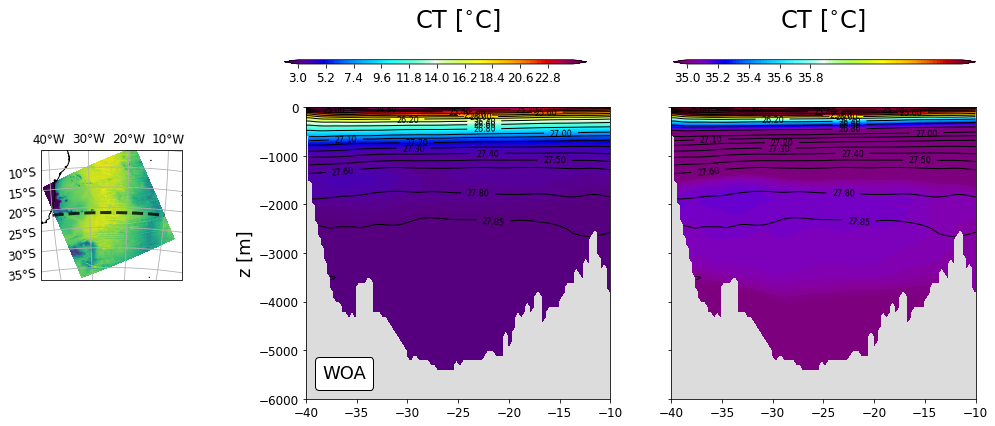

In [80]:
my_plot(topo, -depth, CT_woa, SA_woa, rho_woa, woa = True)

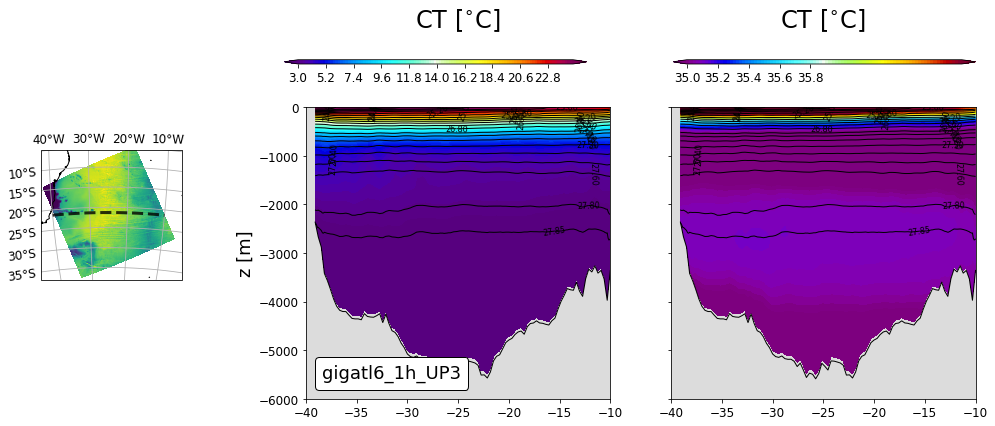

In [83]:
case = 'gigatl6_1h_UP3'; year = 2009
topo, depth_mod, CT_mod, SA_mod, rho_mod = get_data(case, year, elem_mod,coef_mod )
my_plot(topo, depth_mod, CT_mod, SA_mod, rho_mod)

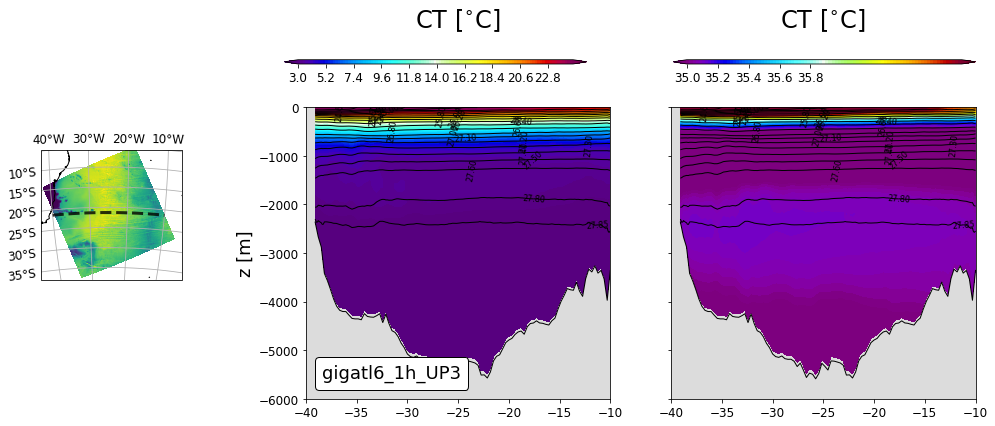

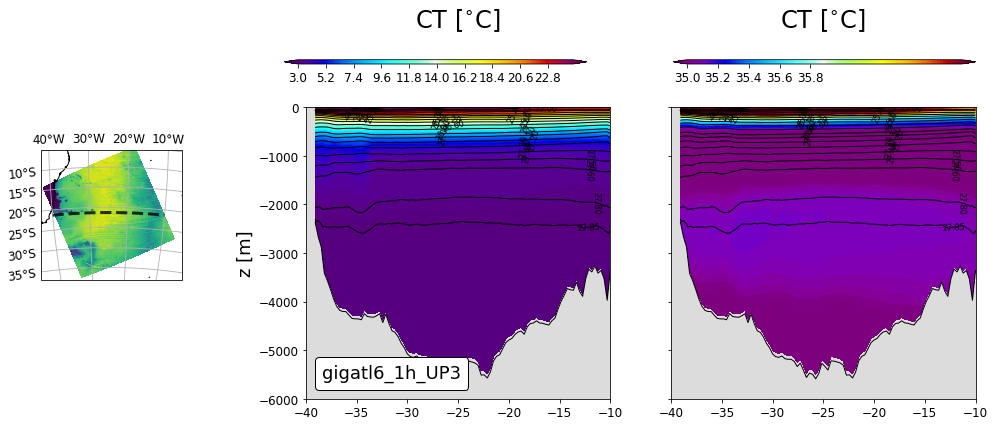

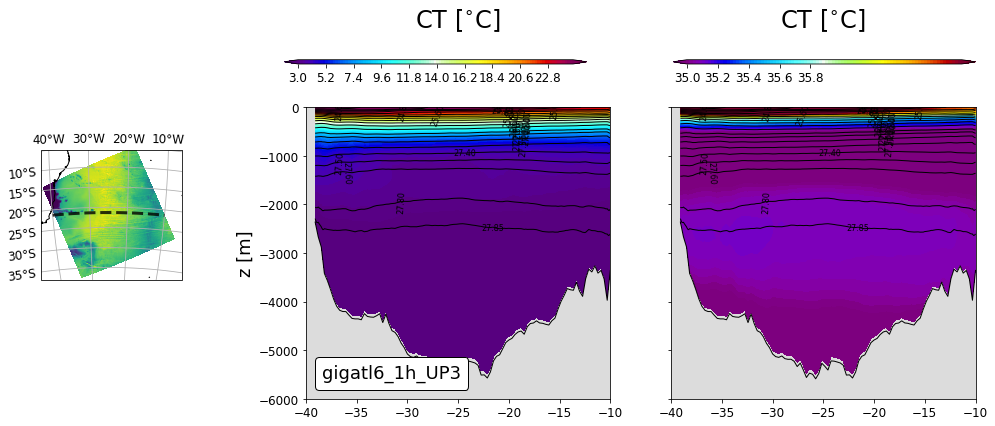

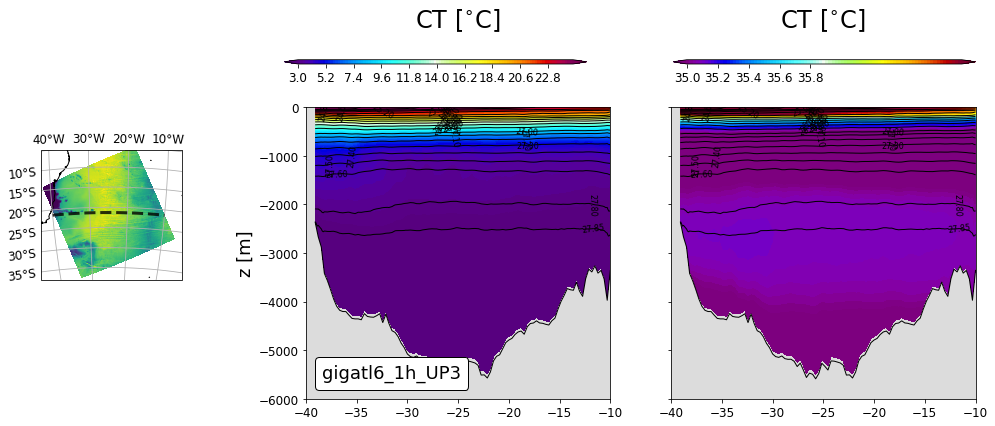

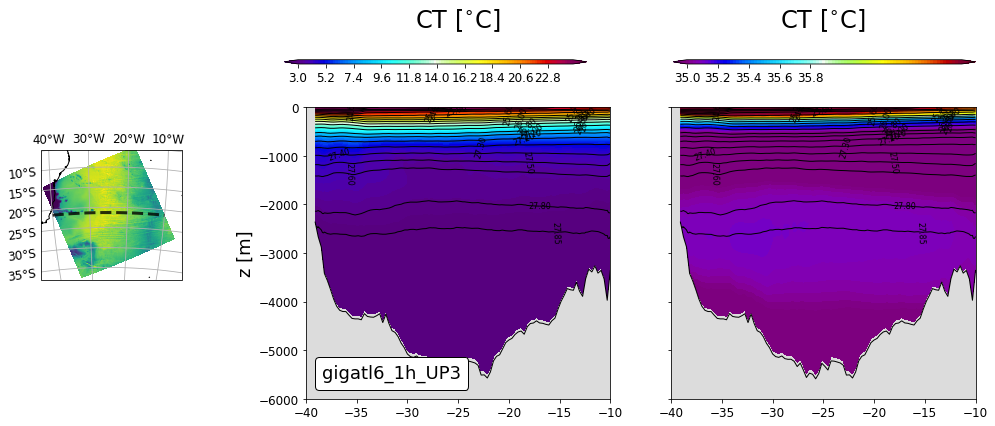

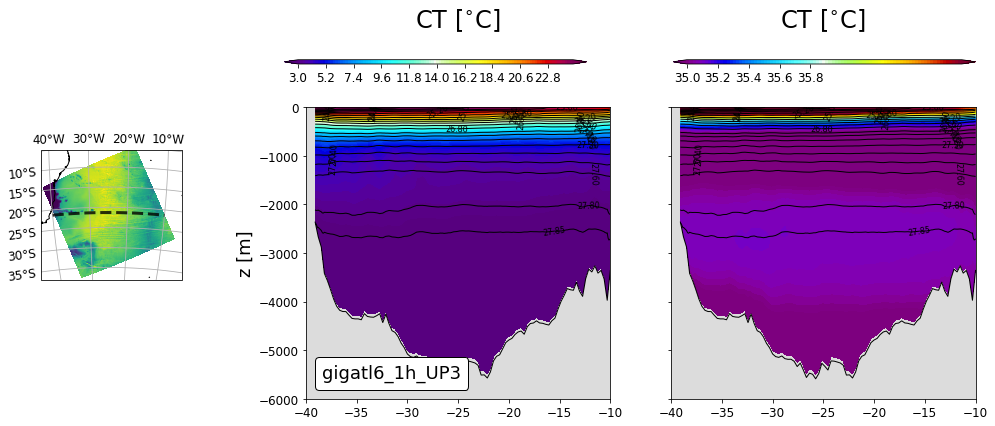

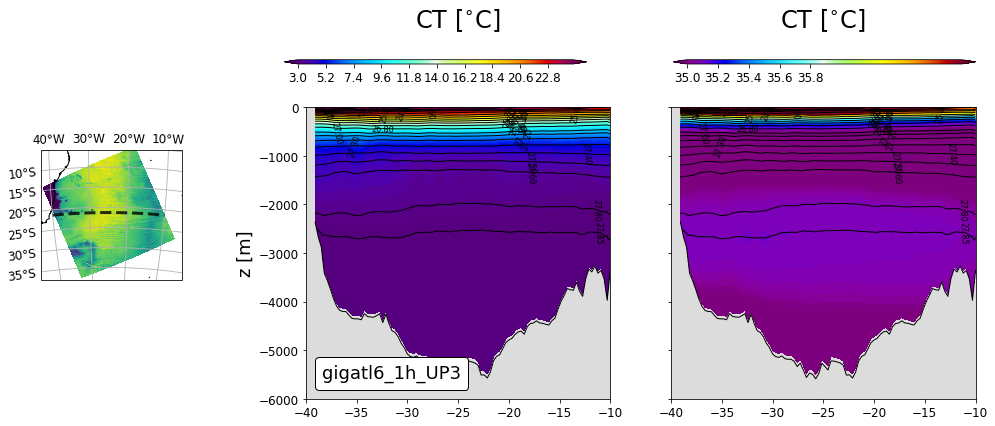

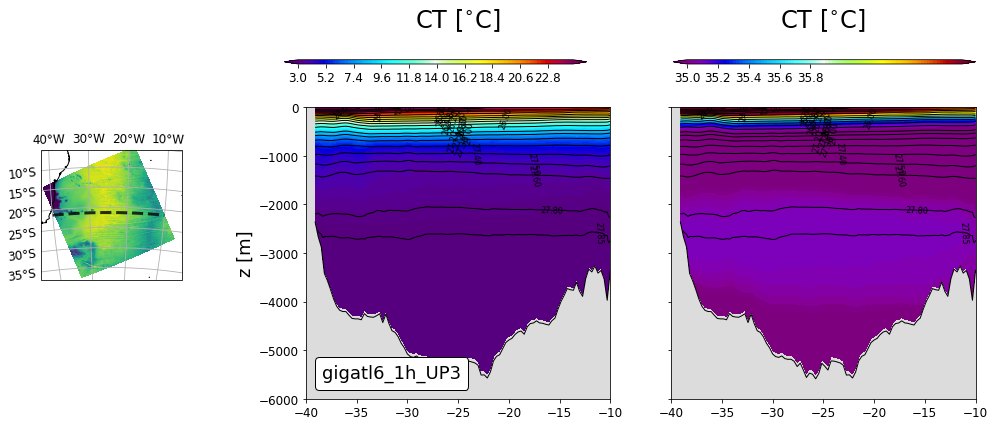

In [87]:


for year in range(2004,2012):

    ratlbigyear = int(year) - 2004

    #for case in ['gigatl6_1h_UP3_noHB_clim','gigatl6_1h_UP3_clim',\
    #             'gigatl6_1h_UP3_KPP_ratlbig','gigatl6_ratlbig_new_interz_online','gigatl6_ratlbig_new_interz','gigatl6_ratlbig_new_inter','gigatl6_ratlbig_new',\
    #             'gigatl6_6h_UP3_KPP','gigatl6_1h_UP3_KPP_noCFB','gigatl6_1h_filt_UP3_KPP','gigatl6_1h_tides','gigatl6_1h_UP3_KPP','gigatl6_1h_UP3_KPP_noHB',\
    #             'gigatl6_1h_GEO','gigatl6_1h_UP3_GEO','gigatl6_1h_UP5_GEO5','gigatl6_1h_UP3','gigatl6_1h_UP5',\
    #             'ratlbig'+'{0:02}'.format(ratlbigyear)]:   
        
    #for case in ['gigatl6_1h_UP3','gigatl6_1h_UP3_KPP',\
    #             'gigatl6_1h_UP3_KPP_noHB','gigatl6_1h_UP3_clim',\
    #             'gigatl6_1h_UP3_noHB_clim','ratlbig'+'{0:02}'.format(ratlbigyear)]:  
        
    for case in ['gigatl6_1h_UP3']:
        
        try:
            
            topo, depth_mod, CT_mod, SA_mod, rho_mod = get_data(case, year, elem_mod,coef_mod )

            my_plot(topo, depth_mod, CT_mod, SA_mod, rho_mod)

        except:
            
            print('problem with '  + case + ' for year ' + format(year))    

        

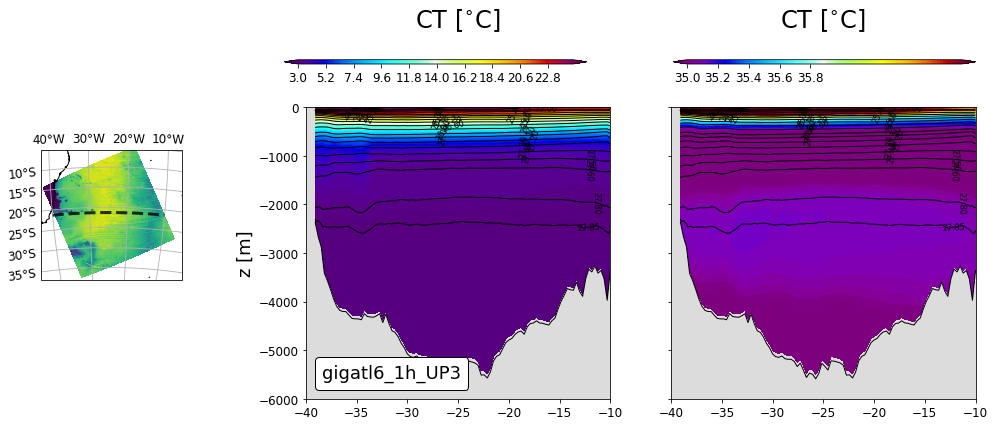

In [86]:
case = 'gigatl6_1h_UP3'; year = 2005
topo, depth_mod, CT_mod, SA_mod, rho_mod = get_data(case, year, elem_mod,coef_mod )
my_plot(topo, depth_mod, CT_mod, SA_mod, rho_mod)
